# Week 4 handin

## 01 Assignment
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
3. Using this data:
	```json
	neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
		5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
		10: 'Amager Vest', 99: 'Udenfor'}
	```
	Find out how many people lived in each of the 11 areas in 2015  
4. Make a bar plot to show the size of each city area from the smallest to the largest in 2015  
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015  
6. How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"  
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015  

## 02 Status
I've decided not to make any of the extra assigments.

Anything else in the assignment have been accounted for.

In [83]:
import numpy

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
		5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
		10: 'Amager Vest', 99: 'Udenfor'}

data = numpy.genfromtxt("./resources/week4/befkbhalderstatkode.csv", delimiter=",", dtype=numpy.uint, skip_header=1)

citizen_city_2015 = {}
for key in neighb.keys():
	mask = (data[:,0] == 2015) & (data[:,1] == key)
	citizen_city_2015[key] = numpy.sum(data[mask][:,4])


print(citizen_city_2015)

{1: 51937, 2: 75113, 3: 78802, 4: 61623, 5: 51727, 6: 39537, 7: 43908, 8: 53604, 9: 55205, 10: 64967, 99: 3872}


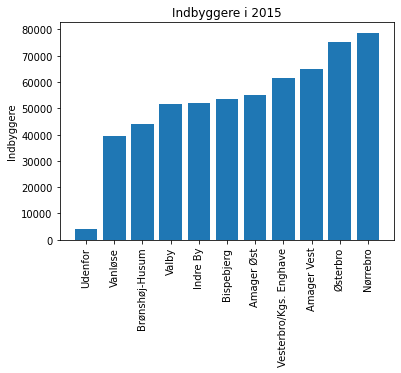

In [84]:
import matplotlib.pyplot as plt

_sorted = dict(sorted(citizen_city_2015.items(), key=lambda item: item[1]))

plt.title("Indbyggere i 2015")
plt.bar([neighb[city_id] for city_id in _sorted], _sorted.values())

plt.xticks(rotation="vertical")
plt.ylabel("Indbyggere")

plt.show()

In [85]:
# Copenhagen I assume means all regions included in neighb

# Probably a better way to do this
citizen_city_2015_above_65 = {}
for key in neighb.keys():
	mask = (data[:,0] == 2015) & (data[:,1] == key) & (data[:,2] > 65)
	citizen_city_2015_above_65[key] = numpy.sum(data[mask][:,4])

sum_people = sum(citizen_city_2015_above_65.values())

print(sum_people)


55750


In [86]:
# Nordic countries not including Denmark
# Our needle.
countries = {5104: "Finland", 5105: "Island", 5110: 'Norge', 5120: "Sverige", 5101: "Grøndland"}

nordic_people_2015_above_65 = {}

def sum_people(city, mask):
	 return data[mask & (data[:,1] == city)][:,4].sum()


for country in countries:
	country_amount = 0

	for city in neighb.keys():
		_mask = (data[:,3] == country) & (data[:,0] == 2015) & (data[:,2] > 65)
		country_amount += sum_people(city, _mask)
	
	nordic_people_2015_above_65[country] = country_amount

# Is this the correct answer? I don't know... Is it an answer? Yes...
print(nordic_people_2015_above_65)
print(sum(nordic_people_2015_above_65.values()))




{5104: 72, 5105: 2, 5110: 236, 5120: 267, 5101: 0}
577


In [87]:

# People per year in Vesterbro and Østerbro
people_per_year = {}

cities = [4,2]

for year in range(1992, 2015):
	people_amount = 0
	for city in cities:
		_mask = (data[:,0] == year)
		people_amount += sum_people(city, _mask)

	people_per_year[year] = people_amount

print(people_per_year)

{1992: 110075, 1993: 110172, 1994: 110588, 1995: 111205, 1996: 112237, 1997: 114131, 1998: 115257, 1999: 115815, 2000: 116985, 2001: 117633, 2002: 118059, 2003: 118595, 2004: 118385, 2005: 118314, 2006: 117654, 2007: 118294, 2008: 119430, 2009: 122120, 2010: 125266, 2011: 128088, 2012: 130811, 2013: 132599, 2014: 134849}


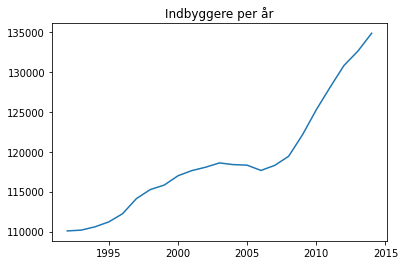

In [90]:
import matplotlib.pyplot as plt

plt.title("Indbyggere per år")
plt.plot(people_per_year.keys(), people_per_year.values())

plt.show()